# **Project Name - Brain Tumor MRI Image Classification**

## **Project Type**- Classification

## **Contribution** - Individual

## **Name** - Janani Ravi

# **Project Summary** 

# **GitHub Link** - [Click here](https://github.com/Jan2309jr/Brain-Tumor-MRI-Image-Classification.git)

# **Problem Statement**

This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# **Understanding my Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/_classes.csv
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0161_jpg.rf.9595624d4c3f9d8a33cf3c886be7d369.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0501_jpg.rf.0856fb4f2ec41cc13d2a852ee73d0097.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0396_jpg.rf.e47ecb1bd123384104cf24389da7152b.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0604_jpg.rf.81ab948f941bd95a4e948a6fe8ee8b91.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0433_jpg.rf.24f5708aee10d051bb80fa981e806cc3.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0490_jpg.rf.db7294a768cc96df556cfdd5229da795.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0448_jpg.rf.58bc8c0c68ddafab07875d740879e86b.jpg
/kaggle/input/brain-

## Importing Libraries

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-16 14:25:20.982432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752675921.182289      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752675921.237386      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading dataset

In [3]:
base_dir = "/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset" #dataset location

for split in ['train', 'valid', 'test']: #splitting based on folders in the dataset
    print("-------------------")
    print(f"\nSplit: {split.upper()}\n") #prints folder name
    for cls in os.listdir(os.path.join(base_dir, split)):
        cls_path = os.path.join(base_dir, split, cls) #base_dir/split
        if os.path.isdir(cls_path): #to check if its a folder 
            count = len(os.listdir(cls_path)) #counts no of files (images) in the folder
            print(f"Class: {cls} — {count} images") #prints the data


-------------------

Split: TRAIN

Class: pituitary — 438 images
Class: no_tumor — 335 images
Class: meningioma — 358 images
Class: glioma — 564 images
-------------------

Split: VALID

Class: pituitary — 118 images
Class: no_tumor — 99 images
Class: meningioma — 124 images
Class: glioma — 161 images
-------------------

Split: TEST

Class: pituitary — 54 images
Class: no_tumor — 49 images
Class: meningioma — 63 images
Class: glioma — 80 images



 Class: pituitary


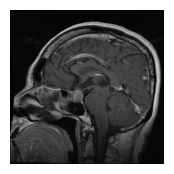

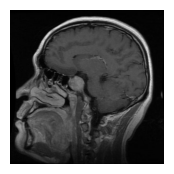

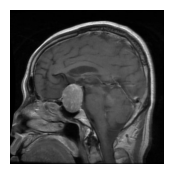


 Class: no_tumor


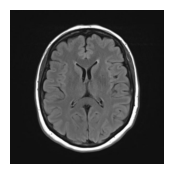

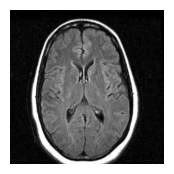

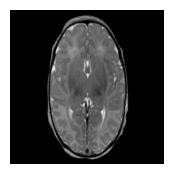


 Class: meningioma


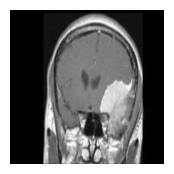

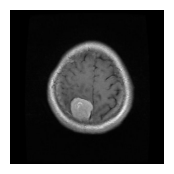

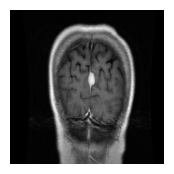


 Class: glioma


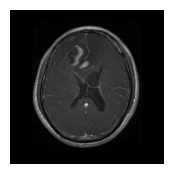

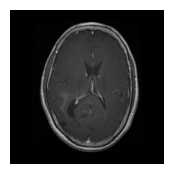

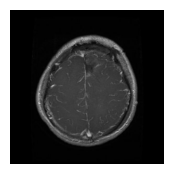

In [4]:
def show_sample_images(folder_path, n=3):
    classes = os.listdir(folder_path)
    for cls in classes:
        cls_path = os.path.join(folder_path, cls)
        if not os.path.isdir(cls_path): continue
        img_files = os.listdir(cls_path)[:n]
        print(f"\n Class: {cls}")
        for img_file in img_files:
            img_path = os.path.join(cls_path, img_file)
            img = Image.open(img_path)
            plt.figure(figsize=(2,2))
            plt.imshow(img)
            # plt.title(f"{cls} - {img_file}")
            plt.axis("off")
            plt.show()

# Show from train folder
show_sample_images(os.path.join(base_dir, 'train'))
